### Importación de datos



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Explorando los datos
print(tienda.shape)
print(tienda.head())
print(tienda.info())
print(tienda.describe())


(2359, 12)
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de

# Limpieza de datos 
### Se cambiara el tipo de dato de la columna "Fecha de Compra" a formato datetime

In [32]:
tienda["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")
tienda2["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")
tienda3["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")
tienda4["Fecha de Compra"] = pd.to_datetime(tienda["Fecha de Compra"], format="%d/%m/%Y")

# 1. Análisis de facturación



## Ingresos totales

### Ventas tomando en consideracion solamente la columna precio

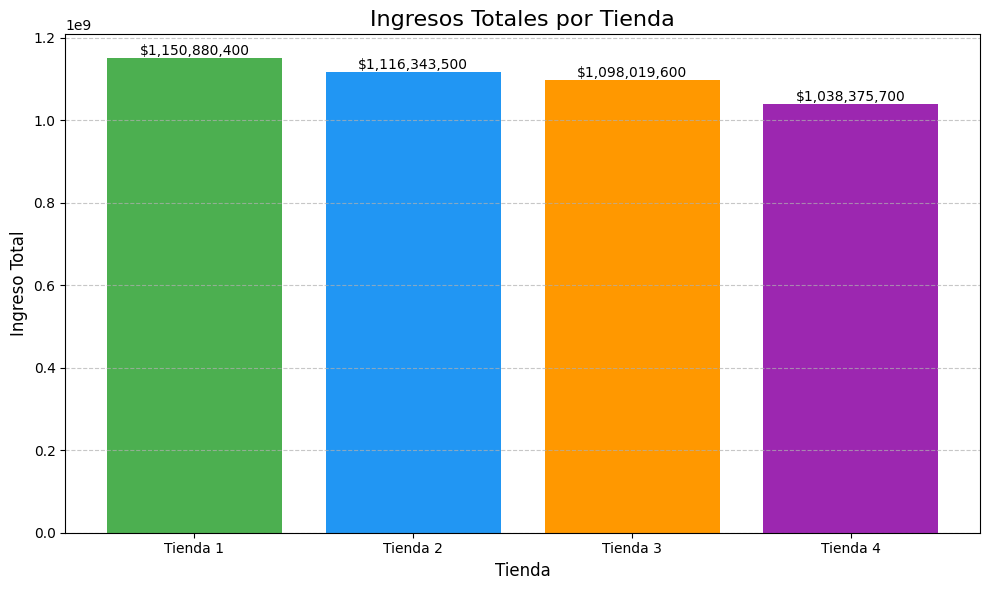

In [36]:
def precio_total(tienda): 
    return tienda["Precio"].sum()

ingreso_precio_tienda1 = precio_total(tienda)
ingreso_precio_tienda2 = precio_total(tienda2)
ingreso_precio_tienda3 = precio_total(tienda3)
ingreso_precio_tienda4 = precio_total(tienda4)

ingreso_precio = {
    "Tienda 1": ingreso_precio_tienda1,
    "Tienda 2": ingreso_precio_tienda2,
    "Tienda 3": ingreso_precio_tienda3,
    "Tienda 4": ingreso_precio_tienda4
}

# Graficando los ingresos totales por tienda
plt.figure(figsize=(10, 6))
bars = plt.bar(ingreso_precio.keys(), ingreso_precio.values(), color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0'])

plt.title('Ingresos Totales por Tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)

# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"${height:,.0f}", 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



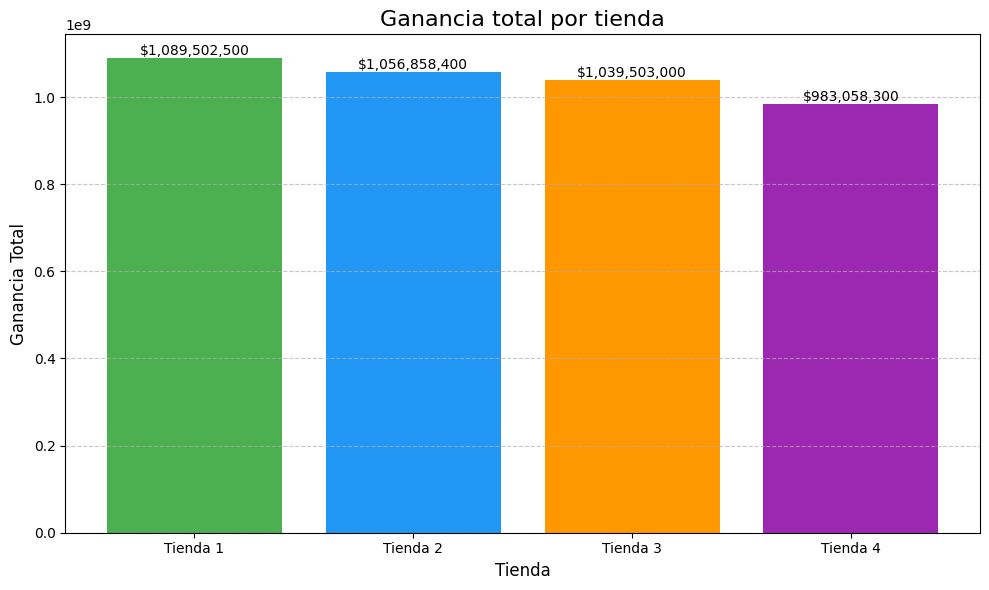

In [39]:
def ganancia_precio_total(tienda): 
    ingreso = tienda["Precio"].sum()
    costo_envio = tienda["Costo de envío"].sum()
    return ingreso - costo_envio

ganancia_precio_tienda1 = ganancia_precio_total(tienda)
ganancia_precio_tienda2 = ganancia_precio_total(tienda2)
ganancia_precio_tienda3 = ganancia_precio_total(tienda3)
ganancia_precio_tienda4 = ganancia_precio_total(tienda4)

ganancia_precio = {
    "Tienda 1": ganancia_precio_tienda1,
    "Tienda 2": ganancia_precio_tienda2,
    "Tienda 3": ganancia_precio_tienda3,
    "Tienda 4": ganancia_precio_tienda4
}


plt.figure(figsize=(10, 6))
bars = plt.bar(ganancia_precio.keys(), ganancia_precio.values(), color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0'])

plt.title('Ganancia total por tienda', fontsize=16)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ganancia Total', fontsize=12)

# Añadir etiquetas de datos encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"${height:,.0f}", 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
def numero_ventas_productos

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda